<a href="https://colab.research.google.com/github/aayushbokde/DL_study/blob/main/Dropout_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
X_train = np.linspace(-1, 1, 20)
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [8]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, -0.00135, -0.2006, -0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [9]:
X_test = np.linspace(-1, 1, 20)

In [10]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

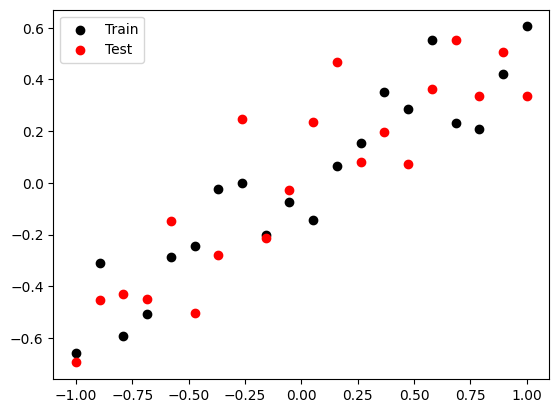

In [12]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c = 'red', label = 'Test')
plt.legend(


)
plt.show()

In [13]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',  optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test,y_test), verbose = False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from operator import xor
# evaluating the model
_,train_mse = model.evaluate(X_train, y_train, verbose=0)
_,test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train:{}, Test:{}'.format(train_mse, test_mse))

Train:0.0026181915309280157, Test:0.04175388067960739


In [15]:
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


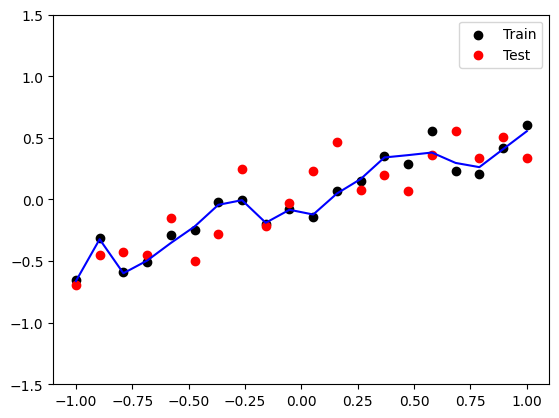

In [16]:
plt.figure()
plt.scatter(X_train,y_train, c = 'black', label='Train')
plt.scatter(X_test,  y_test, c = 'red', label = 'Test')
plt.plot(X_test, y_pred, c = 'blue')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

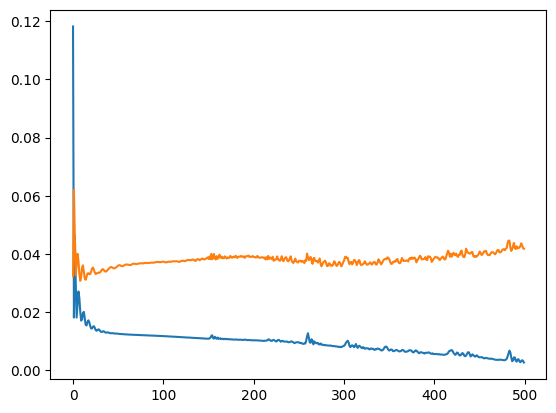

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


DROPOUT MODEL

In [21]:
import keras
from keras.layers import Dropout

model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',  optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test,y_test), verbose = False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from operator import xor
# evaluating the model
_,train_mse = model.evaluate(X_train, y_train, verbose=0)
_,test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train:{}, Test:{}'.format(train_mse, test_mse))

Train:0.009842977859079838, Test:0.0356590561568737


In [23]:
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


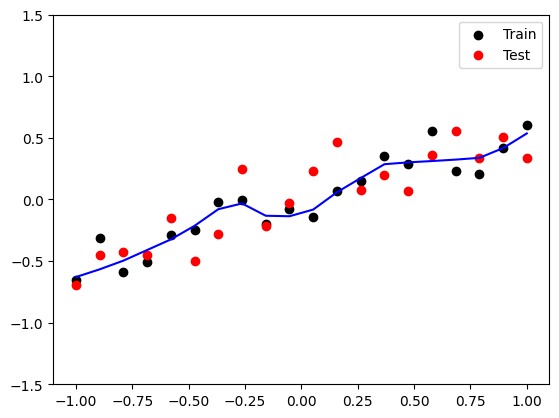

In [24]:
plt.figure()
plt.scatter(X_train,y_train, c = 'black', label='Train')
plt.scatter(X_test,  y_test, c = 'red', label = 'Test')
plt.plot(X_test, y_pred, c = 'blue')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

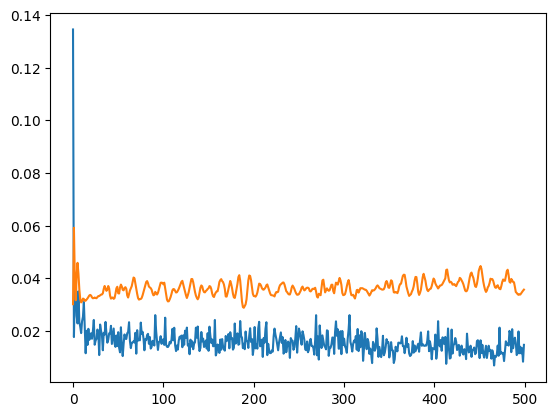

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
# the gap between training loss and test loss is reduced